## Data Description<br>
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response 1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

**Import dataset**

In [2]:
df = pd.read_csv("train.csv")

# Exploratory Data Analysis

## 1. Descriptive Statistics

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Checking Columns Type and its detail**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


__Semua kolom yang tersedia sudah sesuai dengan seharusnya namun ada penyesuaian untuk tahap EDA dan Visualization__

**Checking Null Values**

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Tidak ada kolom yang memiliki nilai null, kita akan cek juga untuk nilai unik masing-masing kolom**

In [6]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
id -> 381109
Gender -> 2
Age -> 66
Driving_License -> 2
Region_Code -> 53
Previously_Insured -> 2
Vehicle_Age -> 3
Vehicle_Damage -> 2
Annual_Premium -> 48838
Policy_Sales_Channel -> 155
Vintage -> 290
Response -> 2


**Hasil Check:**
- Tidak ada data yang memiliki nilai null
- Semua tipe data sudah sesuai, namun perlu penyesuaian pada EDA dan Pre-Processing untuk Modelling
- Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

**Merubah beberapa variabel yang seharusnya masuk pada Kategorik**

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]]=df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]].astype(np.object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


**Check descriptive statistics kolom numerical**

In [10]:
df.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


**Check descriptive statistics kolom categorical**

In [11]:
df.describe(include=['object'])

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109,381109.0,381109,381109,381109,381109.0,381109
unique,381109,2,2,53.0,2,3,2,155.0,2
top,1,Male,1,28.0,0,1-2 Year,Yes,152.0,0
freq,1,206089,380297,106415.0,206481,200316,192413,134784.0,334399


Tidak ada dominasi yang berlebih di antara tiap unique nilai pada kolom "Gender" dan "Vehicle_Damage".

In [12]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Sedangkan pada kolom "Vehicle_Age" dominasi ada pada nilai "1-2 Year" dan "< 1 Year" dibandinkan dengan "> 2 Years" dengan perbedaan yang cukup signifikan

**Separating Categorical & Numerical Columns**

In [13]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['Age', 'Annual_Premium', 'Vintage'], dtype='object')
Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


## 2. Univariate Analysis

### a. KDE Plot (Numerical) Analysis

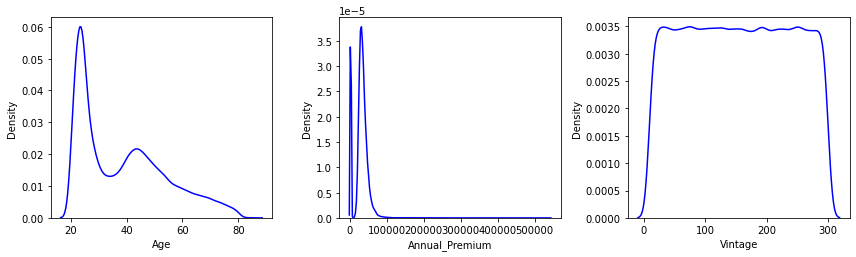

In [14]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

### b. Violin Plot Analysis

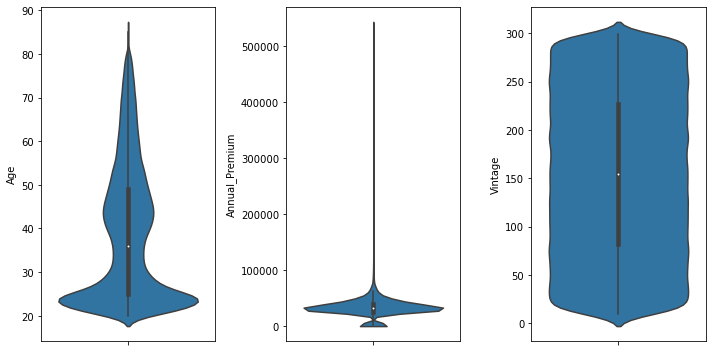

In [15]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1,len(features),i+1)
    sns.violinplot(y=df[features[i]])
    plt.tight_layout()    

**KDE Plot Analysis:**
Dapat kita lihat dari hasil visualisasi di atas bahwa rata-rata distribusi pada kolom Age adalah skewed positively 
Pada Annual_Premium, variabel tersebut memiliki distribusi bimodal dan ekornya cenderung ke arah kanan.

**Violin Plot Analysis:**
Pada violin plot chart nilai dengan outlier terbanyak ada pada kolom "Annual_Premium", pada kolom "Vintage" memiliki distribusi yang merata.

**Outlier pada variabel Annual_Premium:**

In [16]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
outlier = ~((df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit))
outlier_Annual_Premium = df[outlier]
outlier_Annual_Premium.shape

(10320, 12)

Total outlier pada variabel Annual_Premium adalah 10320 baris data 

### c. Countplot Analysis (Categorical)

In [17]:
fitur = cat.drop(['id','Region_Code','Policy_Sales_Channel'], axis=1).columns
fitur

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Response'],
      dtype='object')

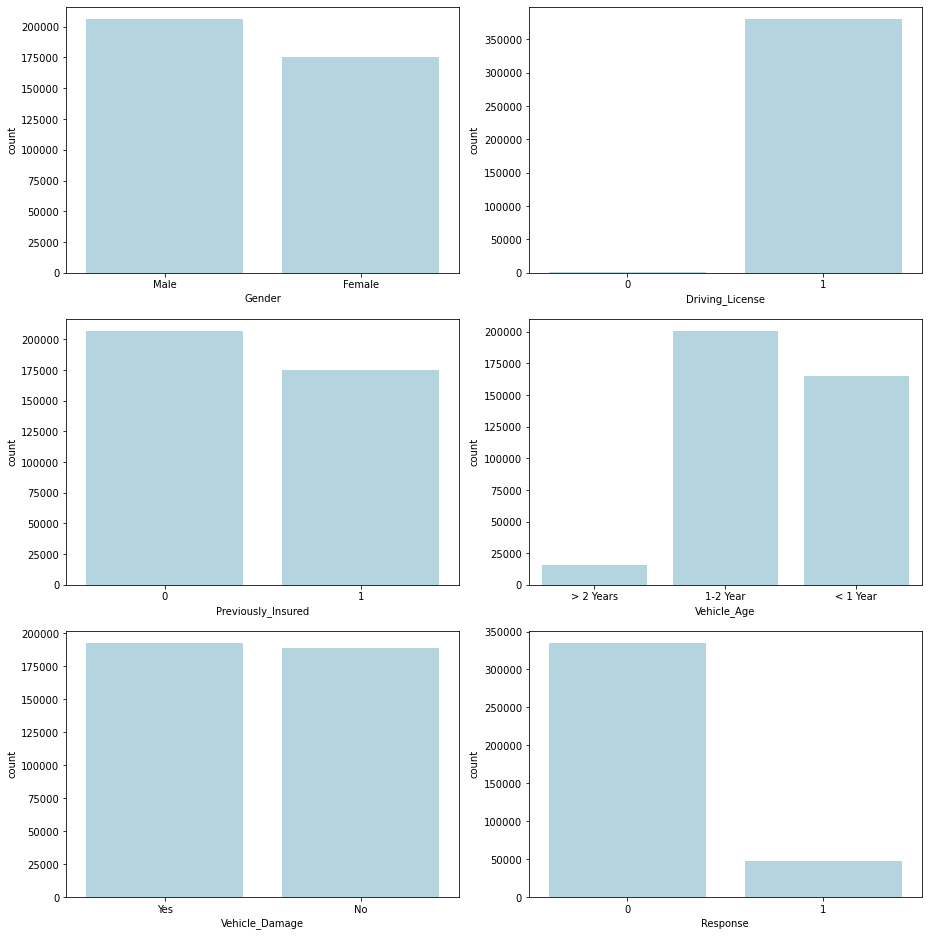

In [18]:
for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (13,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[fitur[i]], color='lightblue')
    plt.tight_layout()

**Countplot pada variabel yang memiliki kardinalitas tinggi**

Pada countplot dengan kardinalitas tinggi, akan diambil TOP 15 dan sisanya diganti dengan other

In [19]:
df_new = df.groupby(['Policy_Sales_Channel'])['id'].count().reset_index()
df_new = df_new.sort_values(by='id',ascending=False).head(15)
df_new.columns=['Policy_Sales_Channel','Frekuensi']
psc = df_new['Policy_Sales_Channel'].unique()
psc

list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['Policy_Sales_Channel'] in psc:
        segment = df['Policy_Sales_Channel'][i]
    else:
        segment = 'Other'
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['Top_Sales'] = list_segment

df_new = df.groupby(['Region_Code'])['id'].count().reset_index()
df_new = df_new.sort_values(by='id',ascending=False).head(15)
df_new.columns=['Region_Code','Frekuensi']
rc = df_new['Region_Code'].unique()
rc

list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['Region_Code'] in rc:
        segment = df['Region_Code'][i]
    else:
        segment = 'Other'
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['Top_Region'] = list_segment
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Top_Sales,Top_Region
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,26.0,28.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,26.0,3.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,26.0,28.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,152.0,11.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,152.0,41.0


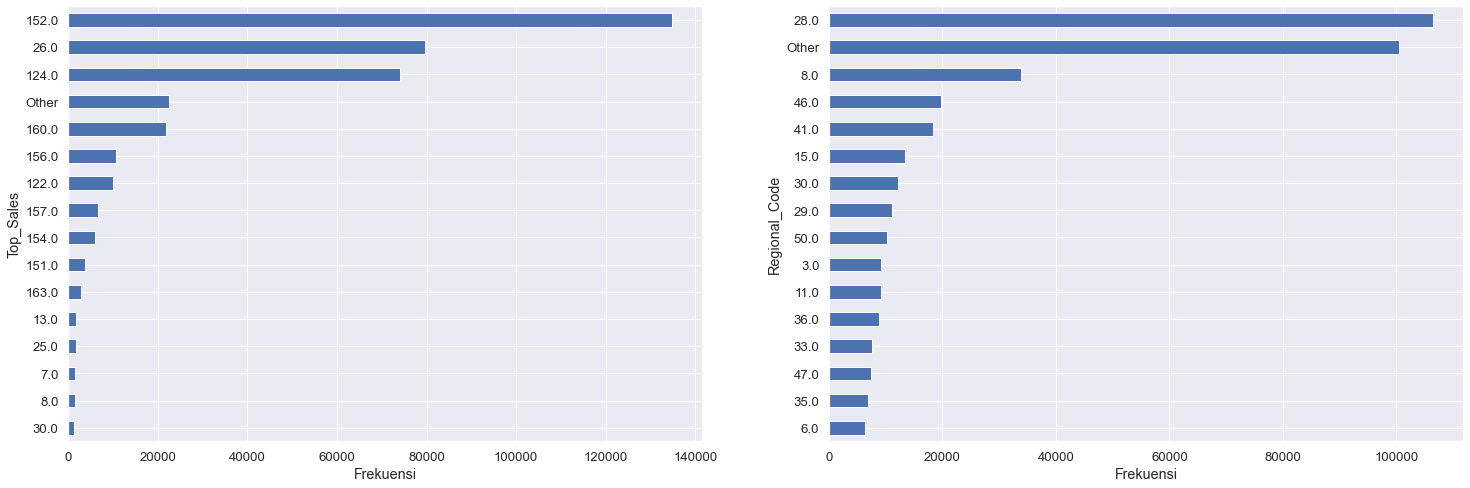

In [20]:
plt.rcParams['figure.figsize'] = (25,8)
sns.set(font_scale=1.2)
plt.subplot(1, 2, 1)
freqPolicy_Sales_Channel = df['Top_Sales'].value_counts(ascending=True)
freqPolicy_Sales_Channel.plot(kind='barh')
plt.ylabel('Top_Sales')
plt.xlabel('Frekuensi')


plt.subplot(1, 2, 2)
freqRegional_Code = df['Top_Region'].value_counts(ascending=True)
freqRegional_Code.plot(kind='barh')
plt.ylabel('Regional_Code')
plt.xlabel('Frekuensi')
plt.show()

**Countplot Analysis:** 
- Tidak ada nilai yang terlalu mendominasi pada kolom Gender, Vehicle_Damage, dan Previously_Insured.
- Kolom Vehicle_Age terdapat dua nilai yang mendominasi yaitu "1-2 Year", "<2 Year".
- Kolom Response sebagai Target dan kolom Driving_License juga memiliki satu nilai yang mendominasi.
- Pada kolom Policy_Sales_Channel atau dapat diartikan Tipe Sales yang diterima pelanggan, tipe dengan kode 152, 26, dan 124 adalah tipe Sales yang menduduki 3 besar terbanyak digunakan.
- Pada Kolom Region_Code, kode Region terbanyak yang terdata adalah kode 28 yang sangat mendominasi dibandingkan yang lainnya.

**Follow Up untuk Pre-Processing**
- Melakukan handling outlier.
- Melakukan standarisasi pada kolom-kolom yang jauh dari distribusi normal.
- Melakukan feature encoding pada kolom yang berisi categorical.
- Melakukan class imbalance pada kolom yang memiliki nilai dominasi pada kolom Response sebagai Target pada case ini.
- Hanya mengambil top 10 atau top 15 dari kolom "Policy_Sales_Channel" dan kolom "Region Code" serta mengubah sisanya menjadi Others.

## 3. Multivariate Analysis

### a. Heatmap Analysis

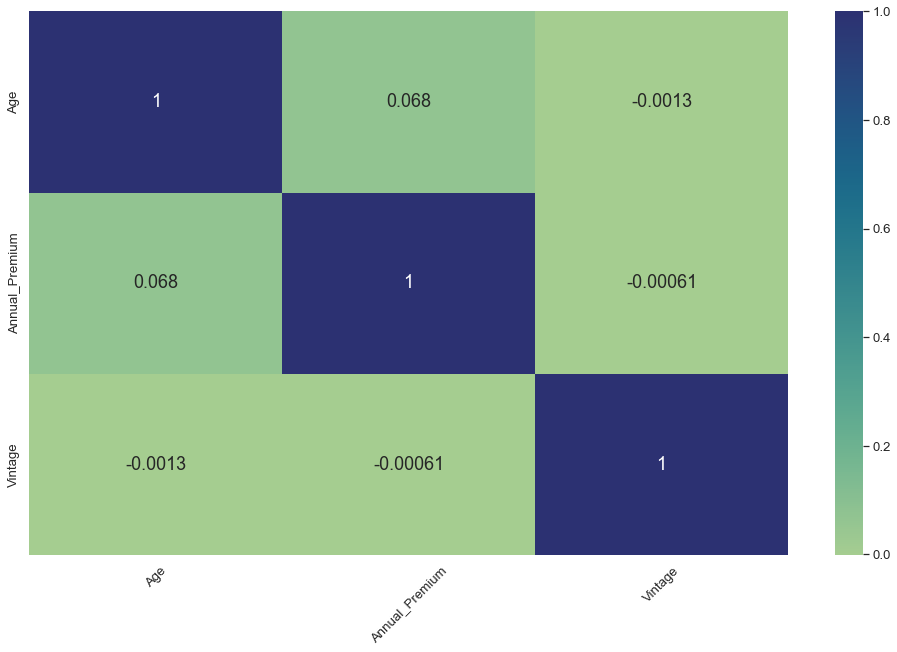

In [21]:
dfcorr = df.drop('id', axis=1)
plt.figure(figsize=(17,10))
sns.set(font_scale=1.2)
sns.heatmap(dfcorr.corr(),cmap="crest",annot=True,annot_kws={"size": 18})
plt.xticks(rotation = 45)
plt.show()

- Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7
- Hanya variable Age dengan Policy_Sales_Channel yang memiliki korelasi yang cukup kuat
- Variabel Response dengan Previously_Insured memiliki korelasi > 0.3 namun cenderung lemah

### **Hasil Uji Statistik ANOVA dan Chi-Square**

In [22]:
yes_resp = df[df["Response"]==1]
no_resp = df[df["Response"]==0]
list=[]

for i in numerical:
    stat, p= st.f_oneway(yes_resp[i], no_resp[i])
    list.append(p)
list
print('Hasil Uji Statistik ANOVA :')
for i in range(0,len(numerical)):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,numerical[i],'p-value',list[i])

    else:
        result =  "Terima H1"
        print(result,numerical[i],'p-value',list[i])   
        
from scipy.stats import chi2_contingency
list=[]

for i in categorical:
    ctab = pd.crosstab(df[i], df['Response'])
    stat, p, dof, expected = chi2_contingency(ctab)
    list.append(p)
list

print()
print('Hasil Uji Statistik Chi-Square :')
for i in range(0,9):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,categorical[i],'p-value',list[i])

    else:
        result =  "Terima H1"
        print(result,categorical[i],'p-value',list[i])

Hasil Uji Statistik ANOVA :
Terima H1 Age p-value 0.0
Terima H1 Annual_Premium p-value 3.722315140370128e-44
Terima H0 Vintage p-value 0.5167036522730712

Hasil Uji Statistik Chi-Square :
Terima H0 id p-value 0.4992384134296765
Terima H1 Gender p-value 7.665800628415621e-230
Terima H1 Driving_License p-value 5.111753504019177e-10
Terima H1 Region_Code p-value 0.0
Terima H1 Previously_Insured p-value 0.0
Terima H1 Vehicle_Age p-value 0.0
Terima H1 Vehicle_Damage p-value 0.0
Terima H1 Policy_Sales_Channel p-value 0.0
Terima H1 Response p-value 0.0


Kesimpulan dari hasil uji statistik : 

Terima H0 : Tidak cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan

Terima H1 : Cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan

In [23]:
print("Memisahkan Variabel Independet dan Dependent")
print()

dependent = df.drop(['id','Vintage'],axis=1)
dependent.columns

independent = df[['id','Vintage']]
independent.columns
print(dependent.columns)
print(independent.columns)

Memisahkan Variabel Independet dan Dependent

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Response', 'Top_Sales', 'Top_Region'],
      dtype='object')
Index(['id', 'Vintage'], dtype='object')


Fitur yang akan digunakan untuk modelling adalah feature/variabel yang dependent 

### b. Boxplot Analysis

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Vintage'>

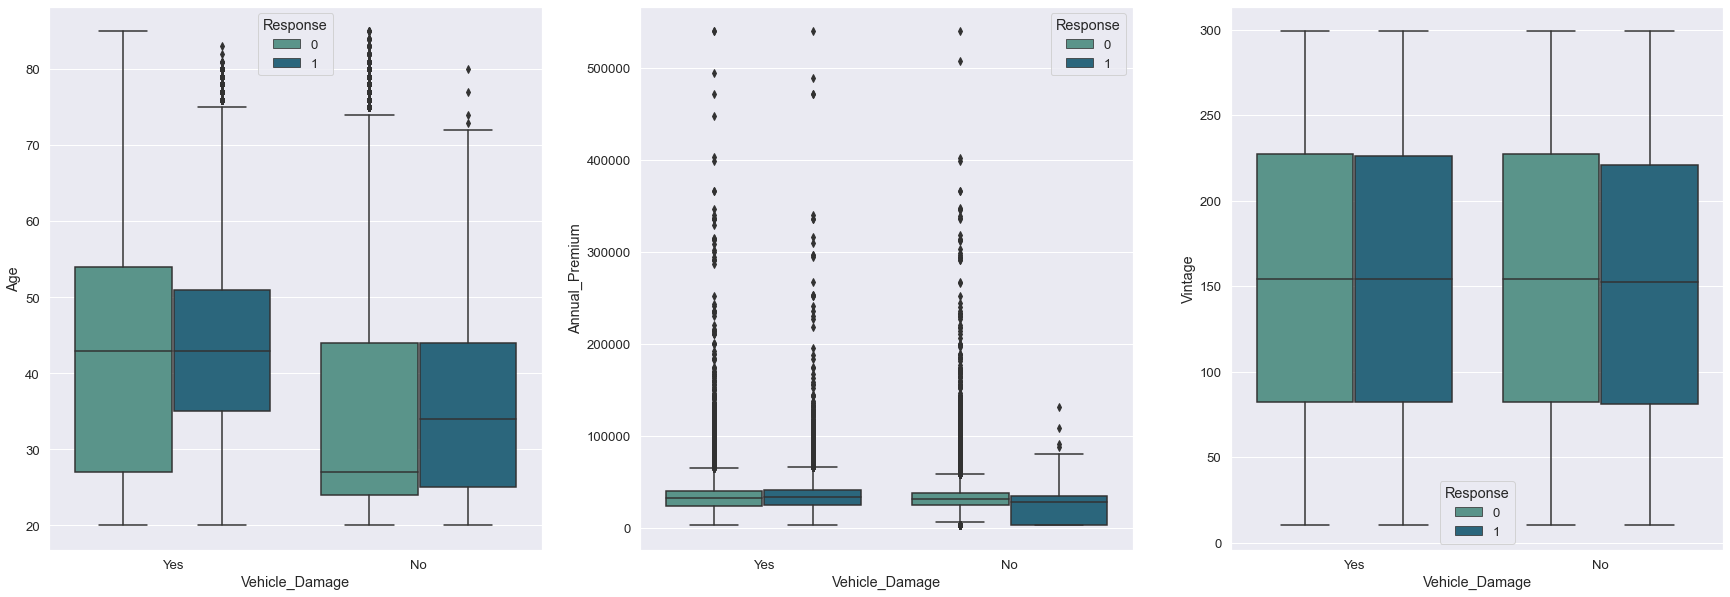

In [24]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Vehicle_Damage", y="Vintage", hue='Response',dodge=True, palette='crest')

- Pada variable Age dapat dilihat yang tidak memiliki Vehicle_Damage baik yang merespon Yes dan No untuk asuransi kendaraan memiliki kelompok rentang umur yang hampir sama. Pada kelompok yang memiliki Vehicle_Damage dan merespon Yes berada pada rentang umur 33-52 tahun.
- Vehicle_Damage terhadap Annual_Premium memiliki distribusi yang cenderung hampir sama dengan tetap memiliki banyak nilai Outliers.
- Vehicle_Damage terhadap Vintage juga memiliki distribusi yang cenderung sama untuk keseluruhannya.

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

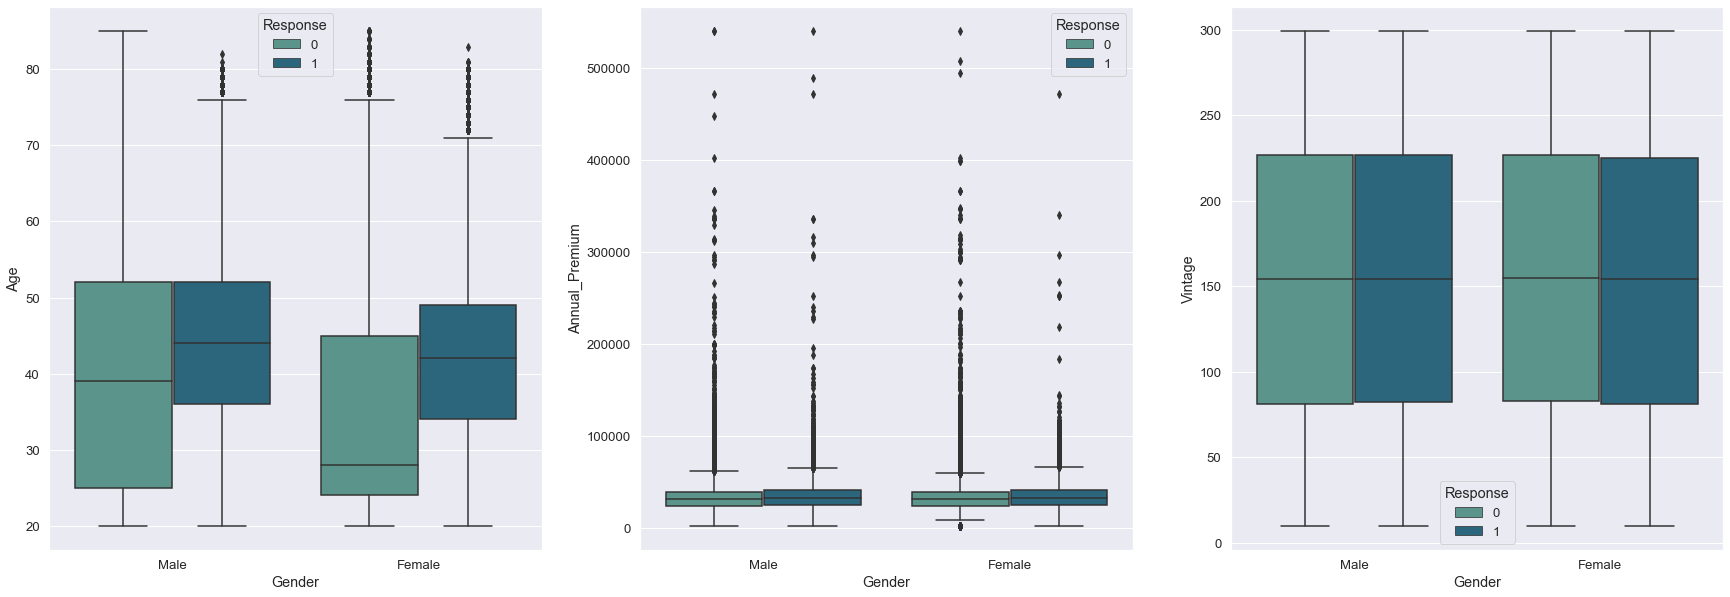

In [25]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Gender", y="Vintage", hue='Response',dodge=True, palette='crest')

- Gender Male yang menolak Asuransi rentang umurnya lebih luas dibandingkan dengan Gender Female. Untuk respon Yes terhadap asuransi Kendaraan kedua Gender memiliki rentang umur yang cenderung sama.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Vintage'>

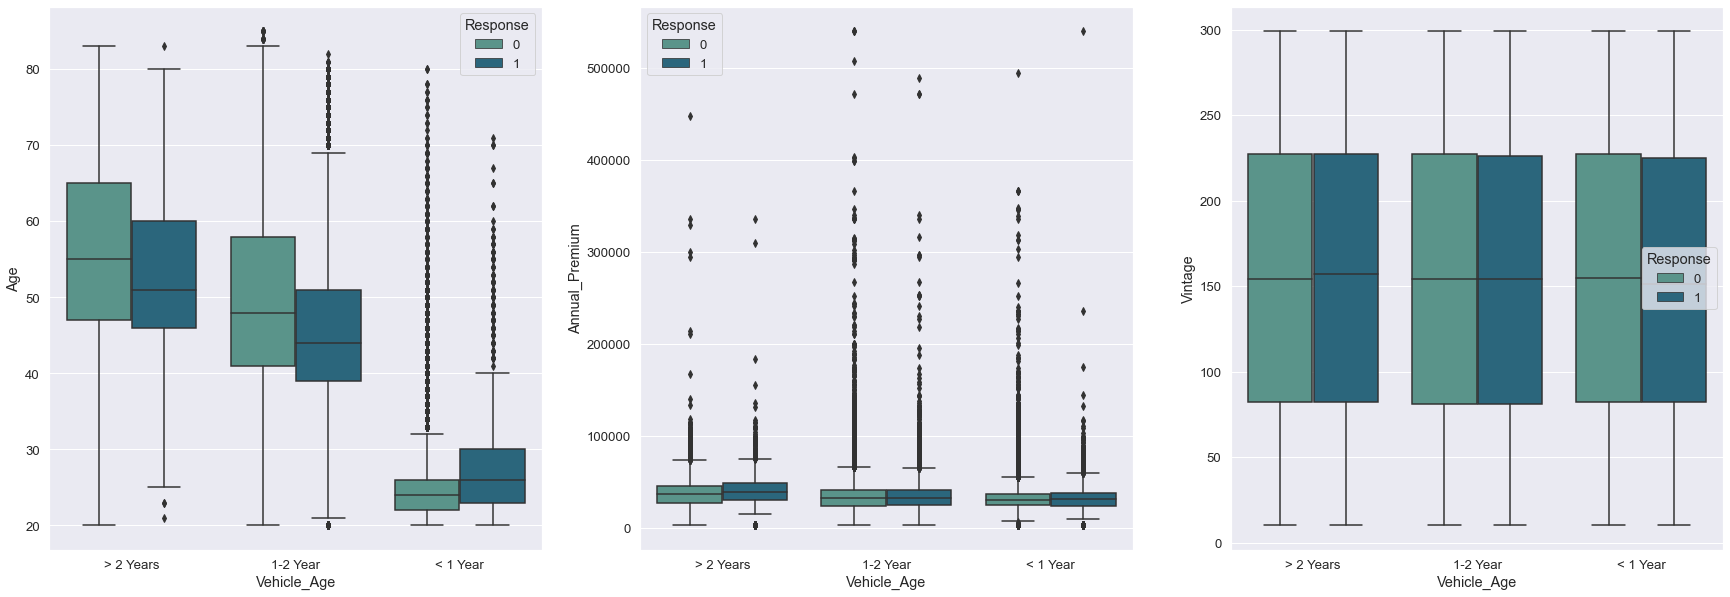

In [26]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Vehicle_Age", y="Vintage", hue='Response',dodge=True, palette='crest')

- Umur kendaraan > 2 Years didominasi oleh customer dengan rentang umur 47 - 65 Tahun, sedangkan umur kendaraan di bawah 1 Tahun dimiliki oleh kelompok rentang umur termuda yaitu 23 - 31 Tahun.
- Umur kendaraan terhadap Annual Premium dan Vintage tidak memiliki perbedaan signifikan jika dilihat dari perbandingan dengan variabel-variabel sebelumnya.

## 4. Business Insight

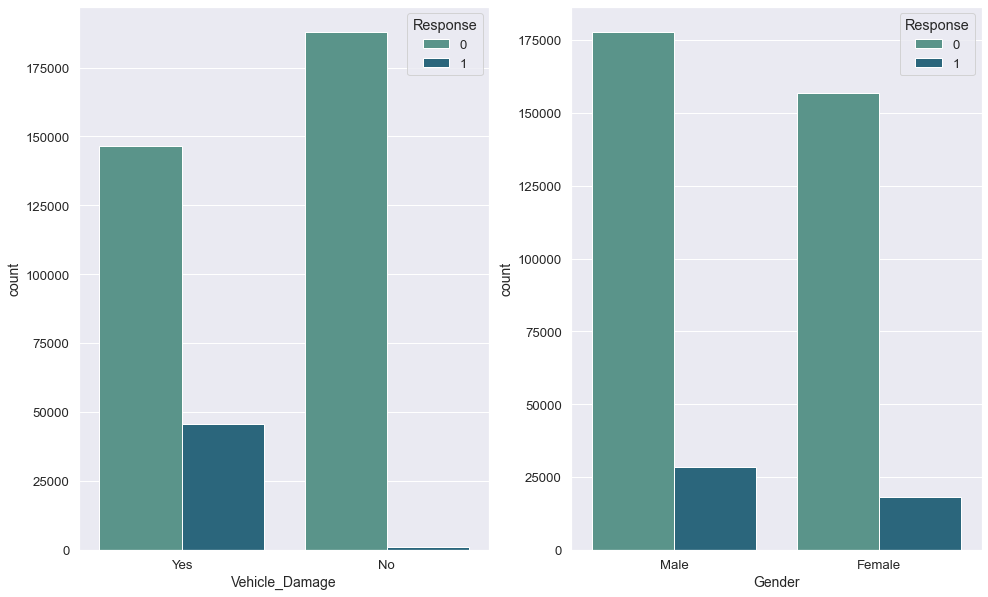

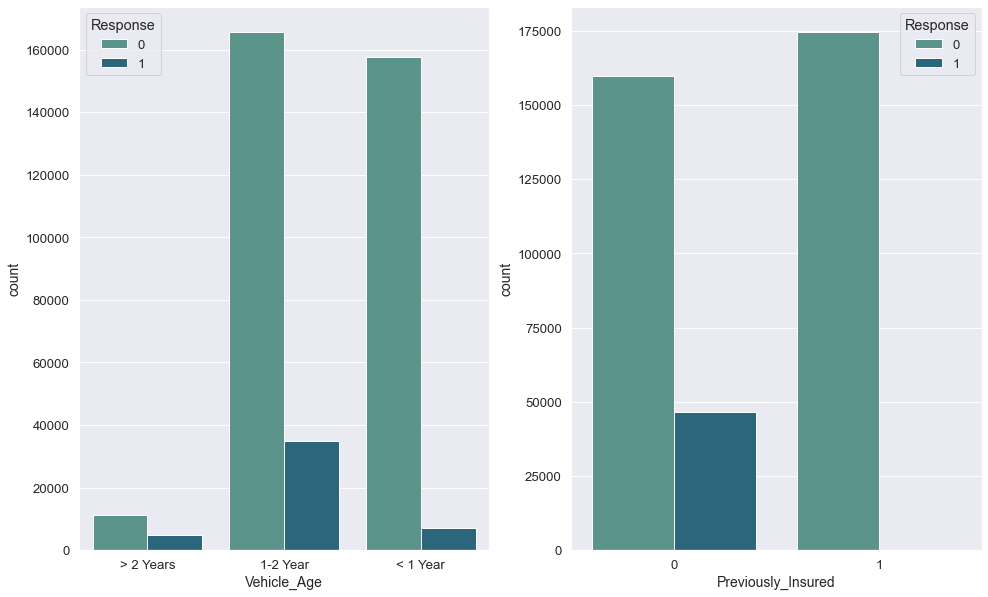

In [27]:
plt.rcParams['figure.figsize'] = (25,10)
plt.subplot(1, 3, 1)
sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'],palette = 'crest')
plt.xlabel('Vehicle_Damage', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.subplot(1, 3, 2)
sns.countplot(df['Gender'], hue=df['Response'],palette = 'crest')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('count', fontsize = 14)


plt.show()
plt.subplot(1, 3, 1)
sns.countplot(df['Vehicle_Age'], hue=df['Response'],palette = 'crest')
plt.xlabel('Vehicle_Age', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.rcParams['figure.figsize'] = (25,5)
plt.subplot(1, 3, 2)
sns.countplot(x=df['Previously_Insured'],hue=df['Response'],palette = 'crest')
plt.xlabel('Previously_Insured', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Frekuensi'>

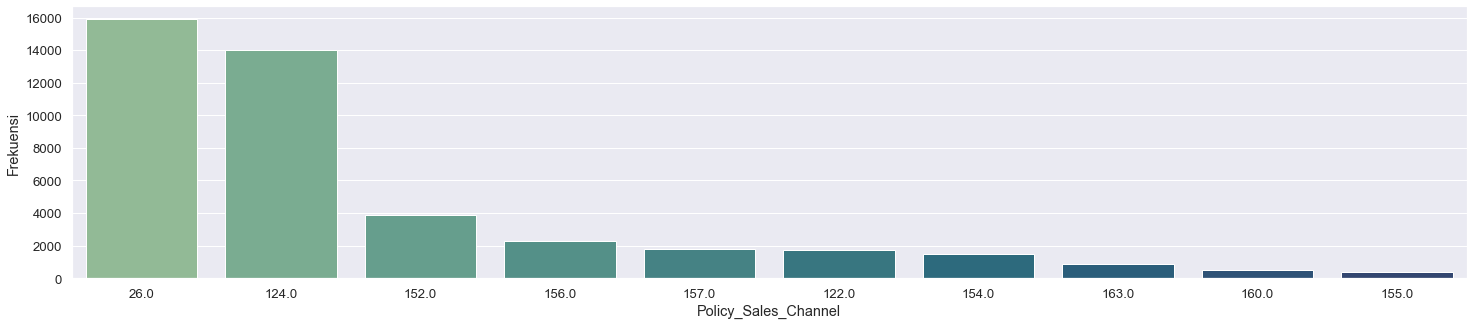

In [28]:
psc = cat[cat['Response']==1].groupby(['Policy_Sales_Channel'])['id'].count().reset_index()
psc = psc.sort_values(by=['id'], ascending=False)
psc = psc.head(10)
psc = psc[['Policy_Sales_Channel','id']]
psc.columns = ['Policy_Sales_Channel','Frekuensi']

psc['Policy_Sales_Channel'] = psc['Policy_Sales_Channel'].astype(str)
sns.barplot(data=psc, x="Policy_Sales_Channel", y="Frekuensi",palette = 'crest')

<AxesSubplot:xlabel='Age', ylabel='Density'>

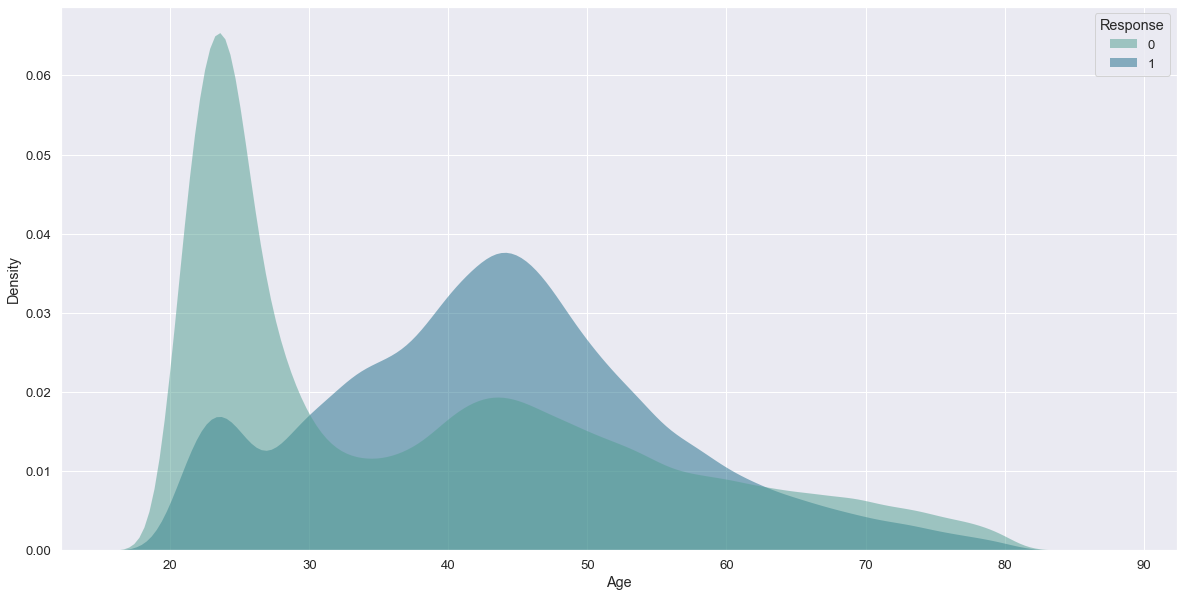

In [29]:
plt.rcParams['figure.figsize'] = (20,10)
sns.kdeplot(data=df, x="Age", hue="Response",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)

In [30]:
import squarify

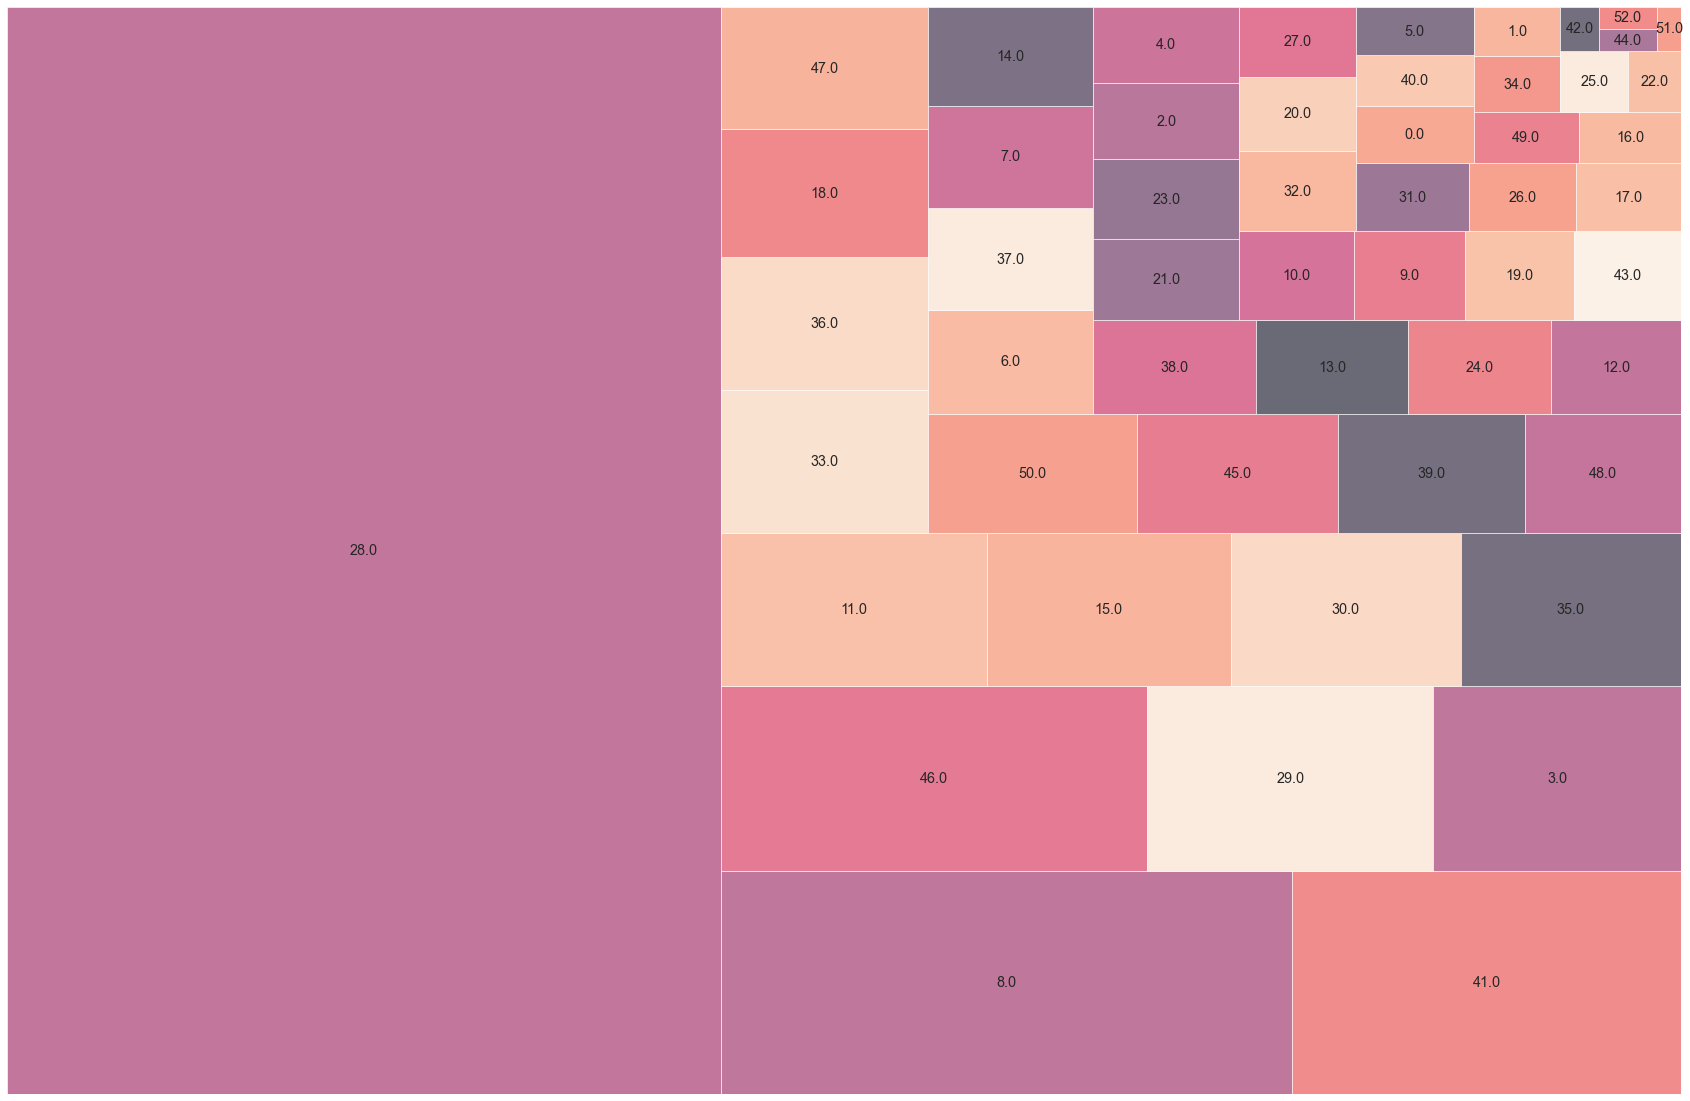

In [31]:
df_yes = df[df['Response']==1]
rc = df_yes.groupby(['Region_Code'])['id'].count().reset_index()
rc = rc.sort_values(by=['id'], ascending=False)
rc.columns = ['Region_Code', 'Frekuensi']
label = rc['Region_Code'].values.tolist()
sizes = rc['Frekuensi'].values.tolist()

plt.rcParams['figure.figsize'] = (30,20)
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

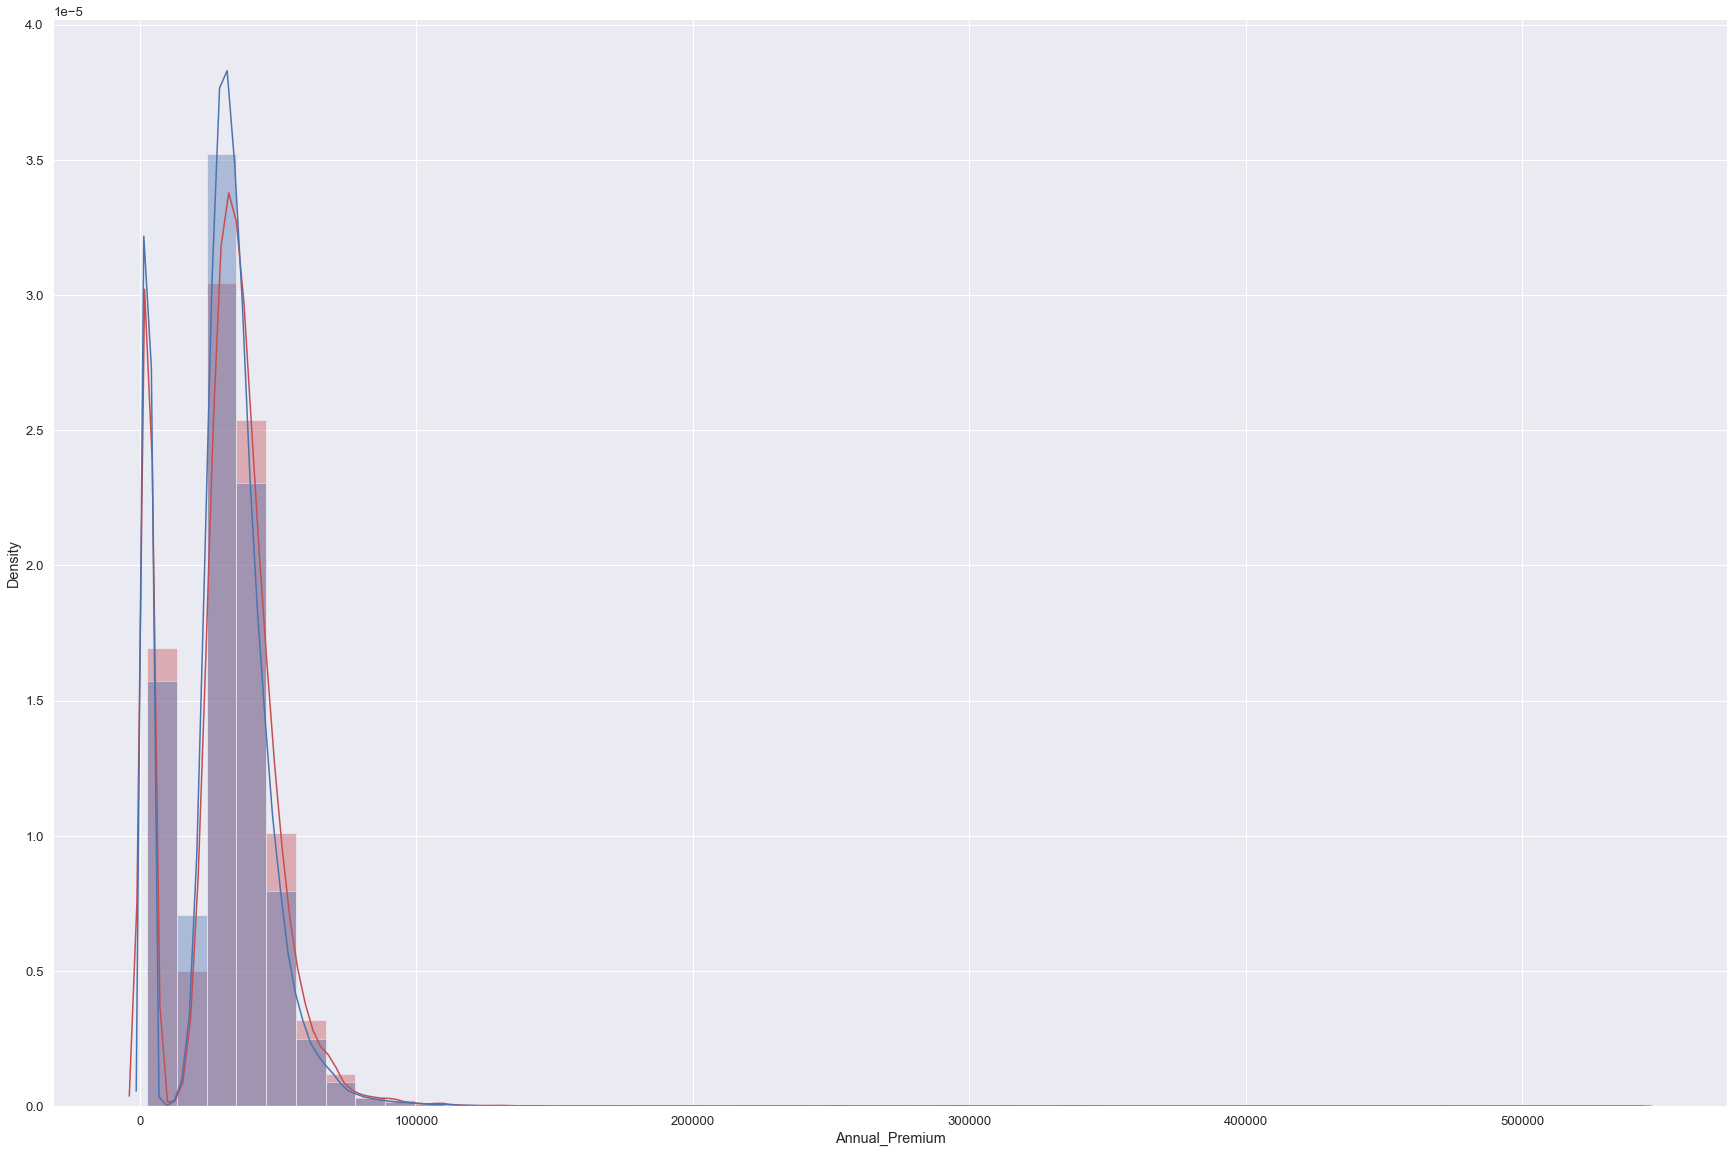

In [32]:
sns.distplot(df[df['Response']==1]["Annual_Premium"],label="response-Yes",color="r")
sns.distplot(df[df['Response']==0]["Annual_Premium"],label="response-No",color="b")


### Business Insigth

- Pada nasabah yang tertarik menggunakan Asuransi Kendaraan, kondisi kendaraan sebelumnya lebih banyak yang telah mengalami kerusakan dibandingkan yang belum. 

- Nasabah yang tertarik menggunakan Asuransi Kendaraan baik Male maupun Female tidak terdapat perbedaan yang signifikan.

- Pada kelompok usia kendaraan 1-2 tahun lebih banyak yang tertarik menggunakan asuransi Kendaraan dibandingkan kelompok lain seperti kelompok usia kendaraan <1 tahun dan usia kendaran >2 tahun

- Nasabah yang tertarik menggunakan Asuransi kendaraan, sebelumnya banyak yang belum menggunakan Asuransi Kendaraan.

- Ada 10 kode jenis Policy_Sales_Channel yang paling banyak dalam memberikan kontribusi ketertarikan nasabah menggunakan Asuransi Kendaraan.

- Usia Nasabah dari 33 – 52 merupakan kelompok umur yang paling banyak tertarik menggunakan Asuransi Kendaraan.

- Ada beberapa Region_Code dengan code 28.0, 41.0, 8.0, 46.0, 29.0, dimana wilayah tersebut nasabah yang tertarik menggunakan Asuransi Kendaraan lebih banyak dibandingkan Region lain.

#### Rekomendasi Bisnis untuk Perusahaan Asuransi:
Perusahaan dapat memfokuskan pada kategori-kategori tersebut untuk menarik nasabah agar lebih banyak yang tertarik menggunakan Asuransi Kendaraan dengan menggunakan strategi yaitu:
1. Menggunakan top 10 jenis Policy_Sales_Channel sebagai media promosinya.
2. Perusahaan dapat memfokuskan pada beberapa Region yang memiliki nasabah dengan ketertarikan Asuransi Kendaraan paling banyak dibandingkan Region lain.
3. Memfokuskan promosi ke user dengan rentang umur 33-52 tahun dan pernah mengalami kerusakan pada kendaraannya serta umur kendaraannya berada pada 1-2 tahun.


# Data Preprocessing

## 1. Handling Missing Value dan Duplicated Data

In [33]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Top_Sales               0
Top_Region              0
dtype: int64

In [34]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Top_Sales               0
Top_Region              0
dtype: int64

In [35]:
df.duplicated().sum()

0

Dapat kita lihat dari hasil coding di atas bahwasanya data tidak memiliki missing values maupun duplicated data sehingga tidak perlu diinput atau didrop data duplikatnya. Kita bisa langsung menuju proses handling outliers.

## 2. Handling Outliers

In [36]:
#Mencoba handling outliers menggunakan IQR
df_i = pd.read_csv('train.csv')
print(f'Jumlah baris sebelum memfilter outlier: {len(df_i)}')

filtered_entries = np.array([True] * len(df_i))
for col in ['Annual_Premium',	'Annual_Premium']:
    Q1 = df_i[col].quantile(0.25)
    Q3 = df_i[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_i[col] >= low_limit) & (df_i[col] <= high_limit)) & filtered_entries
    
df_i = df_i[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_i)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


<Figure size 2160x720 with 0 Axes>

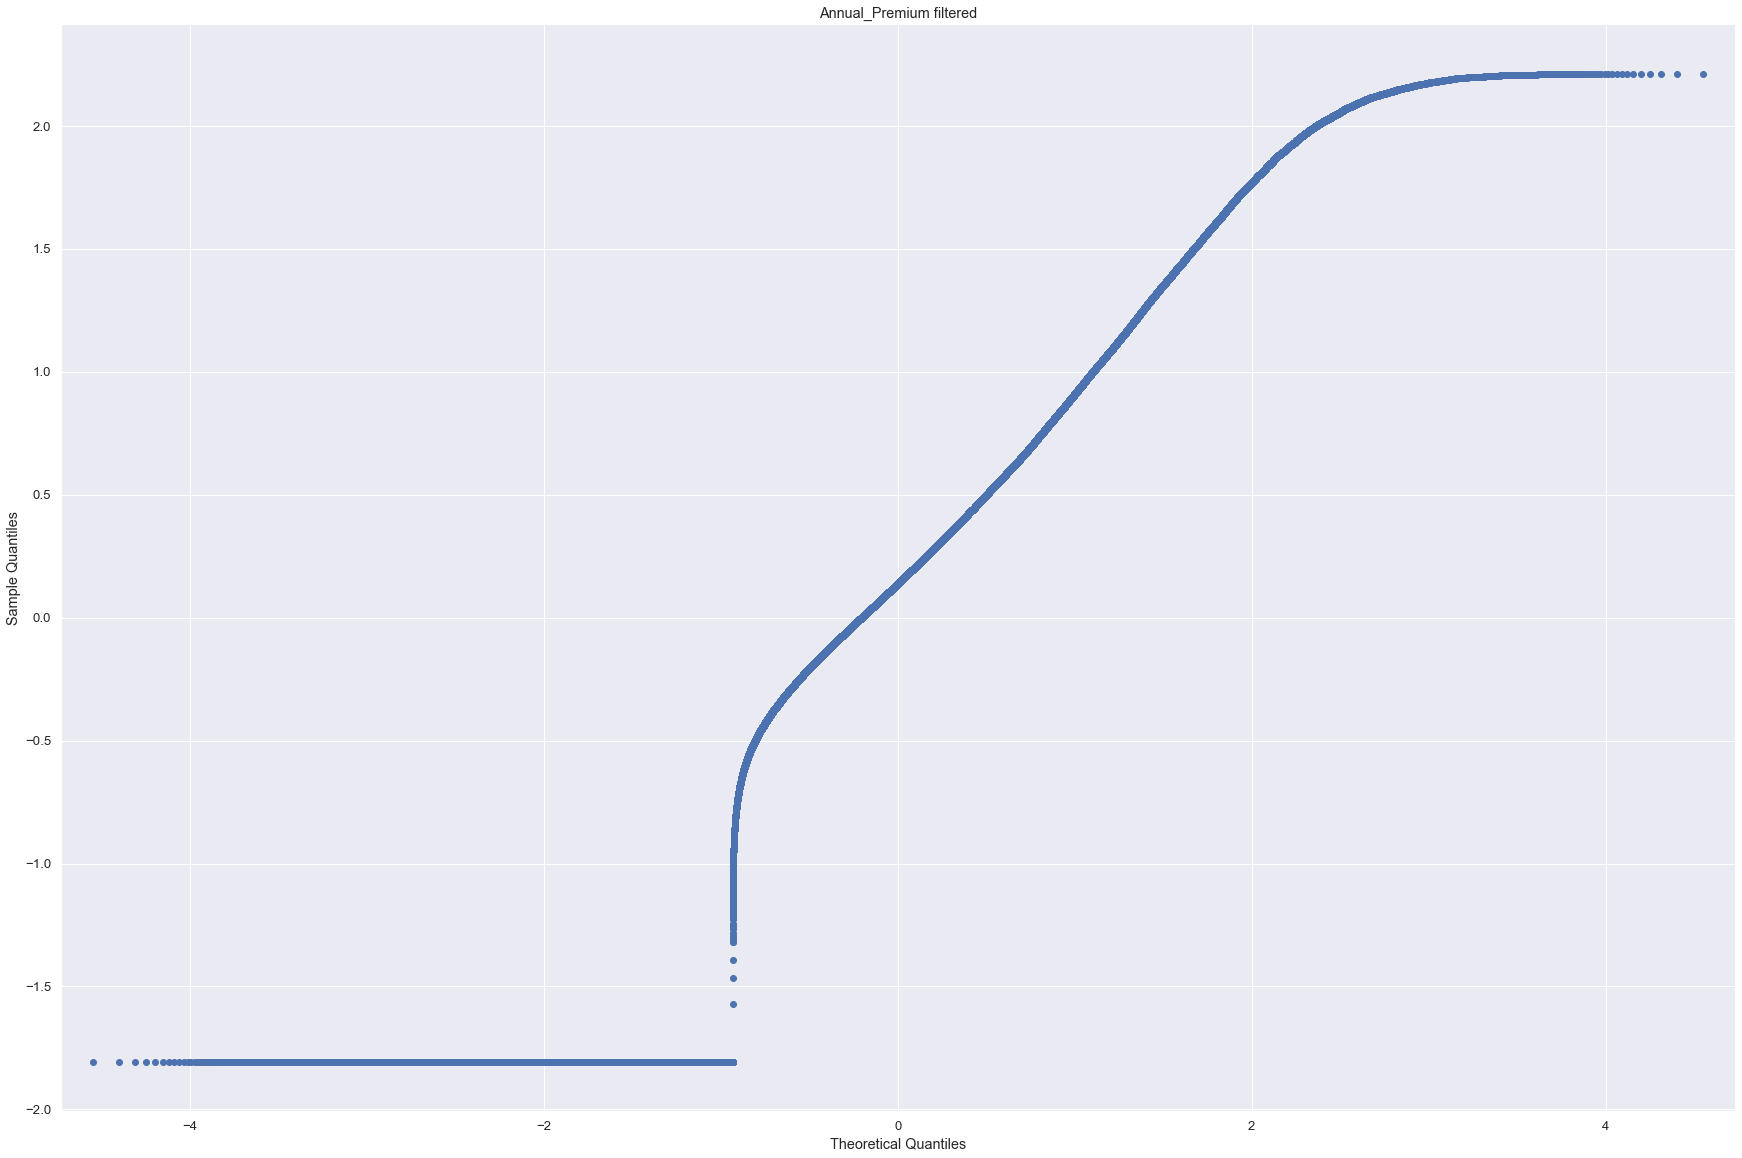

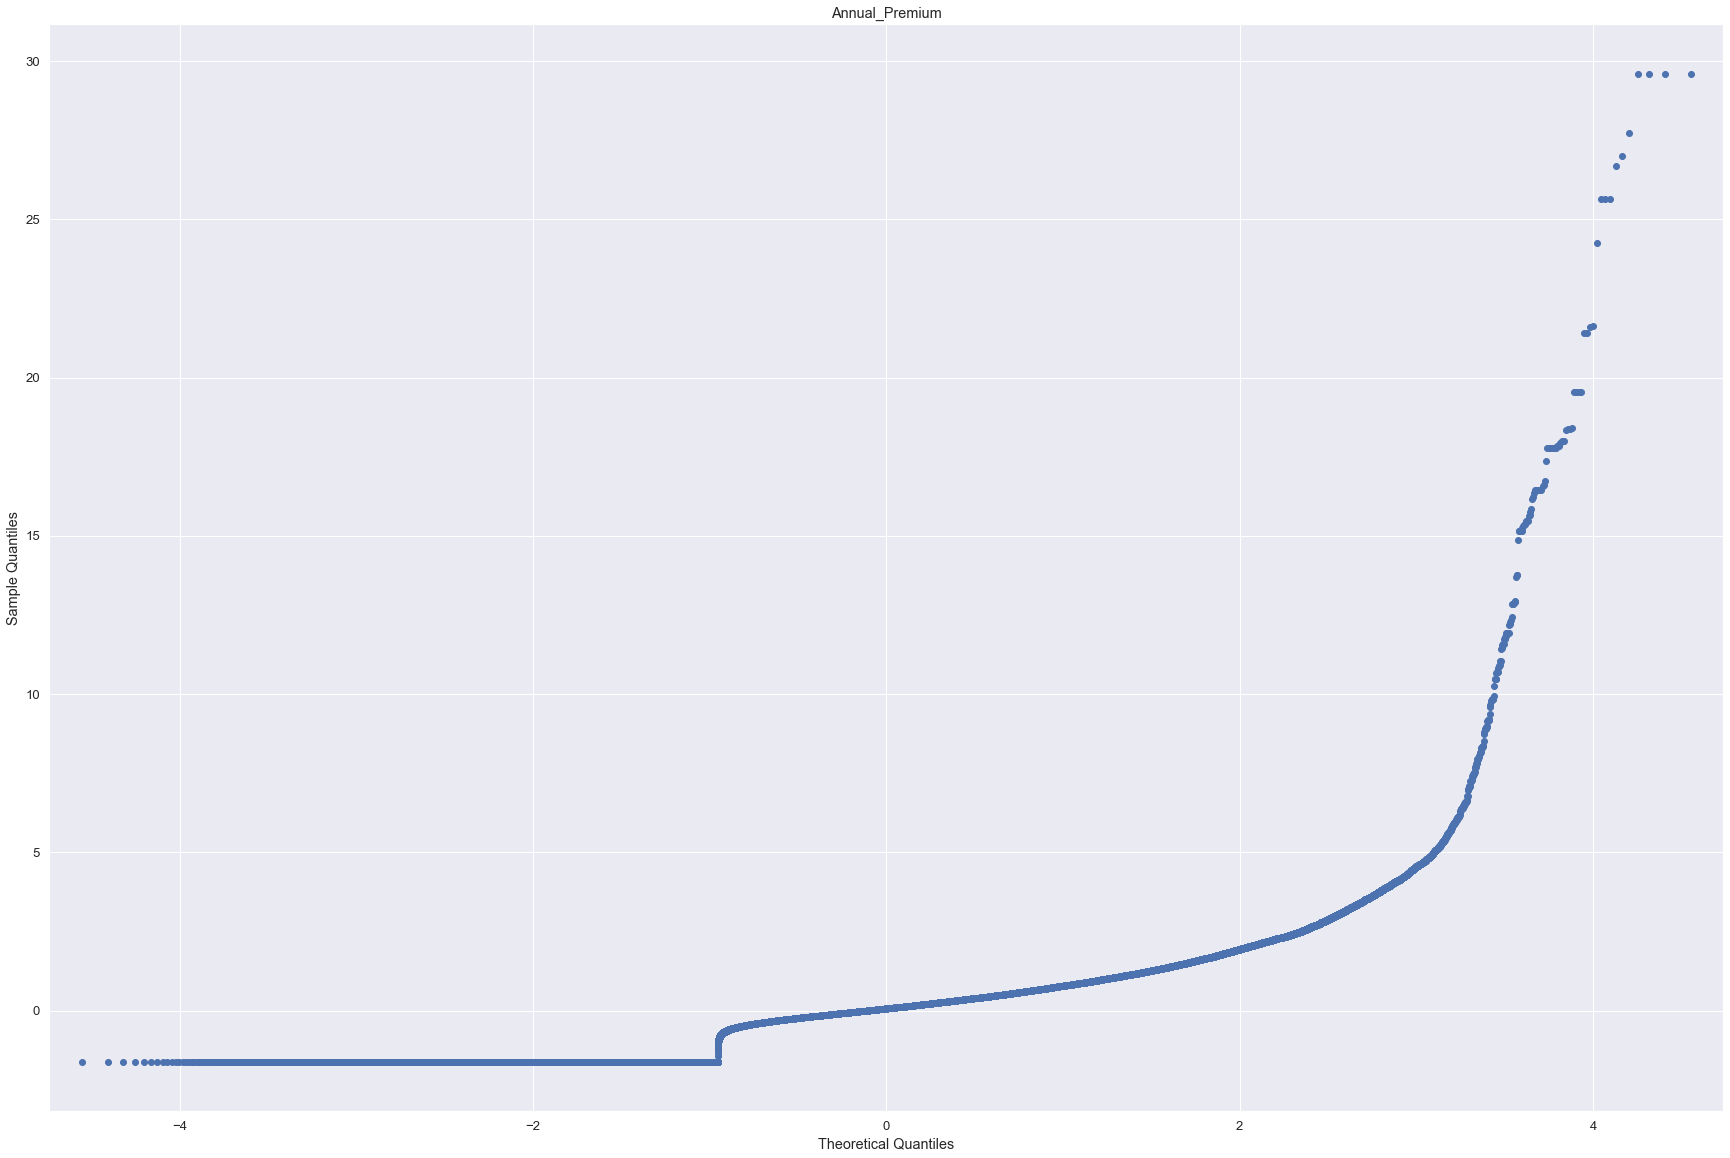

In [37]:
import statsmodels.api as sm
import scipy.stats as stats 

fig = plt.figure(figsize=(30,10))

sm.qqplot(df_i['Annual_Premium'],fit=True,dist=stats.norm)
plt.title("Annual_Premium filtered")

sm.qqplot(df['Annual_Premium'],fit=True,dist=stats.norm)
plt.title("Annual_Premium")
plt.show()

Berdasarkan hasil analisis outlier menggunakan IQR dan QQ-Plot bahwasanya Outlier nya merupakan collective outlier yaitu outlier masih wajar terjadi di dunia nyata ketika Annual Premium tiap nasabah berbeda-beda tergantung beberapa variabel lainnya, ini bisa dianalisis lebih lanjut jika dibutuhkan.

## 3. Split Data and Feature Selection

Terlebih dahulu kita memilih fitur yang akan kita pakai di model.

### Feature Selection:
a. Berdasarkan hasil uji statistik di atas kami menyimpulkan untuk hanya membuang kolom ID karena kolom ini hanya merepresentasikan id dari customer.<br>
b. Kami juga akan drop kolom Policy_Sales_Channel dan Region_Code karena sudah di Feature Extraction sedari awal dengan memilah top 15 dari masing-masing kolom dan menjadikan sisanya sebagai others.<br>
c. Kolom Vintage juga tidak akan digunakan karena customer masih ada di bawah 1 tahun dan juga berdistribusi uniform, kolom vintage bisa sangat berguna pada nyatanya jika data memiliki nilai lebih dari setahun sebagai perbandingan. Namun pada case ini, vintage tidak terlalu berguna.<br>

In [38]:
feature_predictor = df.drop(["id","Policy_Sales_Channel","Region_Code", "Response", "Vintage"],axis=1).columns

In [39]:
#set variabel feature & target for modelling
X = df[feature_predictor].copy()
y = df["Response"].astype(int)

Kita split terlebih dahulu data train dan data test sebelum diprocessing agar tidak terjadi data leakage.

In [40]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)

## 4. Feature Encoding dan Transformation With Pipeline

In [41]:
# handling numeric
num_var = [ 'Annual_Premium','Age']
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
numeric_pipe = Pipeline([
    ('scaler', scaler),
    ('power', power)])

#handling nominal (Label Encoding)
label_encoder = LabelEncoder()
nominal_var = ['Gender', 'Vehicle_Damage']
nominal_pipe = Pipeline([('label_encoder', label_encoder)])

#handling nominal (Binary Encoding)
binary_encoder = ce.BinaryEncoder()
nominal_binary = ['Top_Sales', 'Top_Region']
binary_pipe = Pipeline([('binary_encoder', binary_encoder)])

#handling ordinal (Ordinal Encoding)
ordinal_var = ['Vehicle_Age']
mapping_va = {'< 1 Year':1,
              '1-2 Year':2,
              '>2 Year':3}
ordinal_encoder = OrdinalEncoder(categories=[mapping_va])
ordinal_pipe = Pipeline([('ordinal_encoder', ordinal_encoder)])

In [42]:
preprocessor = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, num_var),
    ('ordinal_pipe', ordinal_pipe, ordinal_var),
    ('nominal_pipe', nominal_pipe, nominal_var),
    ('binary_pipe', binary_pipe, nominal_binary)])

In [43]:
preprocessor

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['Annual_Premium', 'Age']),
                                ('ordinal_pipe',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[{'1-2 Year': 2,
                                                                              '< 1 Year': 1,
                                                                              '>2 Year': 3}]))]),
                                 ['Vehicle_Age']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('label_encoder',
                                                  LabelEncoder())]),
                                 ['Gender', 'Vehicle_Damage']),
                                ('binary_pipe',
                                 Pipeline(steps=[('binary_encoder',
                                                  BinaryEncoder())]),
                                 ['Top_Sales', 'Top_Region'])])

### Handling Class Imbalance
Untuk handle class imbalance kami akan menggunakan metode Class Weight yang parameternya ada pada model Machine Learning sehingga akan ditunjukkan di Stage 3 nantinya. Alasan kami menggunakan Class Weight adalah karena Class Weight ketika di dalam algoritma modelnya akan memberikan kesempatan lebih kepada kelas minoritas sehingga dapat memberikan penalti yang lebih tinggi kepada kelas minoritas dan algoritme dapat fokus pada pengurangan kesalahan untuk kelas minoritas.<br>
[Terkait Class Weight Parameter](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

### Ide untuk feature tambahan yang dapat membantu performansi model lebih bagus:
1. Feature Vintage (lamanya customer dalam ber-Asuransi) lebih dari setahun, feature tersebut berguna untuk melihat berdasarkan lamanya customer dalam ber Asuransi apakah berpengaruh terhadap Response nya untuk membeli Asuransi Kendaraan juga.
2. Feature 
3.
4.
5.